In [1]:
import sys
sys.path.append('../')
from fcc_utils import *
from scanpy_utils import *

In [91]:
# reload functions when editing file
del sys.modules['scanpy_utils']
from scanpy_utils import *

In [2]:
colon = sc.read('../inputs/GSM2743164_rep1_colon_rnaseq.processed.h5ad')

In [3]:
colon

AnnData object with n_obs × n_vars = 1117 × 500 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'cluster'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'dca', 'fitsne', 'glmpca', 'pca10', 'pca2', 'scvi', 'scvis', 'simlr', 'tsne', 'umap', 'zifa', 'zinbwave'
    layers: 'arcsinh_norm', 'raw_counts'

In [4]:
usage = pd.read_csv('cNMF/colon_cNMF/colon_cNMF.usages.k_8.dt_2_00.consensus.txt', sep='\t', index_col=0)
usage.columns = ['Usage_%s' % i for i in usage.columns]
usage.head()

,Usage_1,Usage_2,Usage_3,Usage_4,Usage_5,Usage_6,Usage_7,Usage_8
index,,,,,,,,
1,118.960004,282.389902,7.328981,253.414220,757.279183,35.489995,0.000000,0.000000
20,7.304917,671.671094,11.880369,4.275095,289.541261,48.436696,136.610154,18.155208
2,0.000000,617.811114,0.000000,61.801077,494.722401,7.215241,0.000000,0.000000
4,0.000000,134.422759,69.613329,161.968919,291.702584,23.514539,272.443830,200.516575
0,41.928487,110.334079,30.640787,30.663767,73.401156,543.156104,1.605372,40.163366


In [5]:
usage_norm = usage.div(usage.sum(axis=1), axis=0)
usage_norm.head()

,Usage_1,Usage_2,Usage_3,Usage_4,Usage_5,Usage_6,Usage_7,Usage_8
index,,,,,,,,
1,0.081767,0.194101,0.005038,0.174184,0.520516,0.024394,0.000000,0.000000
20,0.006150,0.565439,0.010001,0.003599,0.243747,0.040776,0.115004,0.015284
2,0.000000,0.522882,0.000000,0.052305,0.418706,0.006107,0.000000,0.000000
4,0.000000,0.116466,0.060314,0.140332,0.252735,0.020373,0.236049,0.173730
0,0.048089,0.126545,0.035143,0.035169,0.084186,0.622962,0.001841,0.046065


In [6]:
usage_norm.index = usage_norm.index.astype(str)

In [7]:
colon.obs = pd.merge(left=colon.obs, right=usage_norm, how='left', left_index=True, right_index=True)

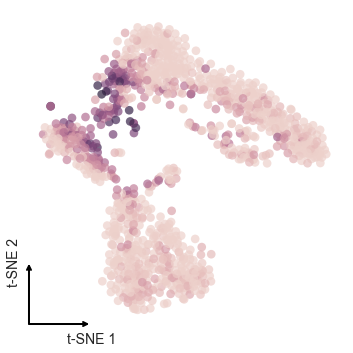

In [8]:
DR_plot(dim_name='t-SNE').plot(colon.obsm['tsne'], color=colon.obs['Usage_1'])

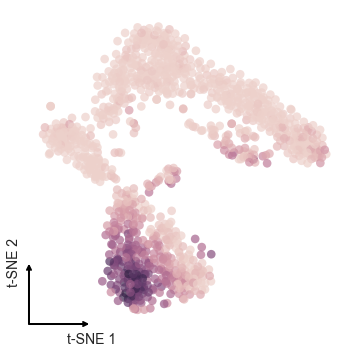

In [9]:
DR_plot(dim_name='t-SNE').plot(colon.obsm['tsne'], color=colon.obs['Usage_2'])

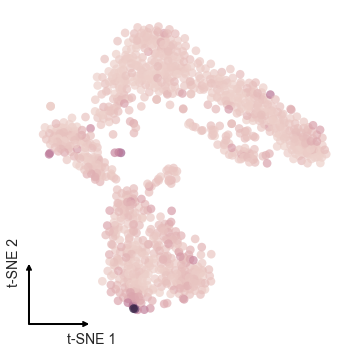

In [10]:
DR_plot(dim_name='t-SNE').plot(colon.obsm['tsne'], color=colon.obs['Usage_3'])

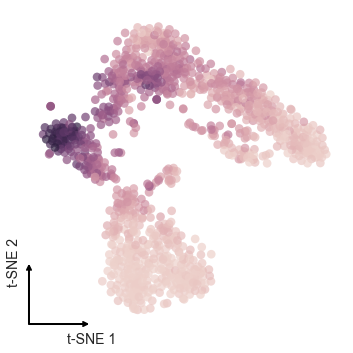

In [11]:
DR_plot(dim_name='t-SNE').plot(colon.obsm['tsne'], color=colon.obs['Usage_4'])

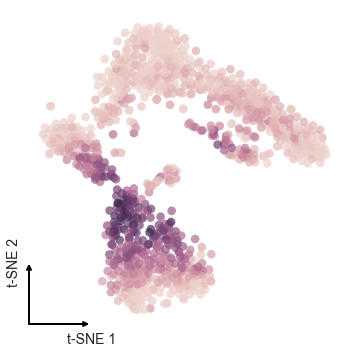

In [12]:
DR_plot(dim_name='t-SNE').plot(colon.obsm['tsne'], color=colon.obs['Usage_5'])

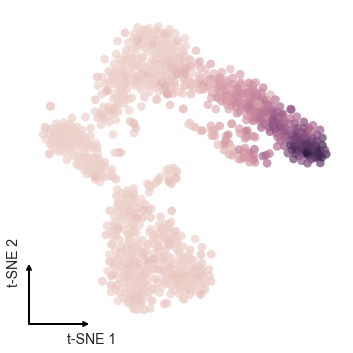

In [13]:
DR_plot(dim_name='t-SNE').plot(colon.obsm['tsne'], color=colon.obs['Usage_6'])

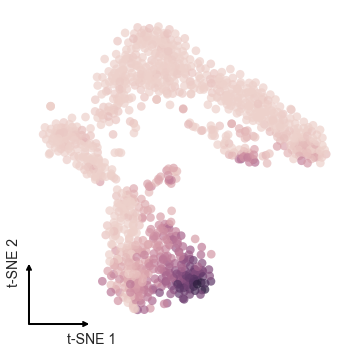

In [14]:
DR_plot(dim_name='t-SNE').plot(colon.obsm['tsne'], color=colon.obs['Usage_7'])

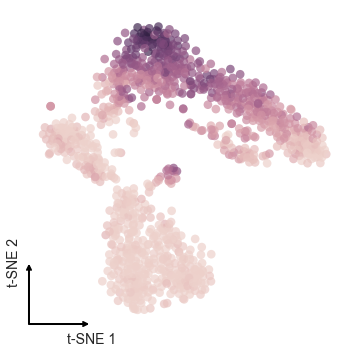

In [15]:
DR_plot(dim_name='t-SNE').plot(colon.obsm['tsne'], color=colon.obs['Usage_8'])

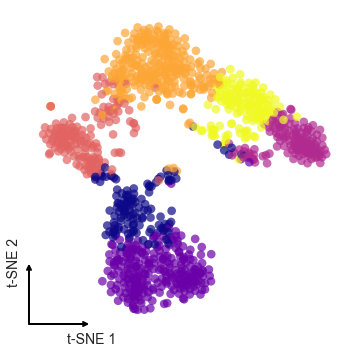

In [16]:
DR_plot(dim_name='t-SNE').plot_IDs(adata=colon, obs_col='cluster', use_rep='tsne')

In [17]:
sc.pp.neighbors(colon, n_neighbors=30, use_rep='X')

In [20]:
sc.tl.leiden(colon)

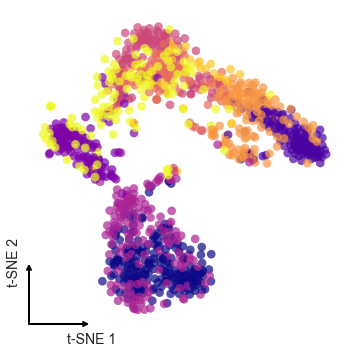

In [21]:
DR_plot(dim_name='t-SNE').plot_IDs(adata=colon, obs_col='leiden', use_rep='tsne')

In [22]:
tmp = sc.read('cNMF/colon_cNMF/cnmf_tmp/colon_cNMF.tpm.h5ad')

In [23]:
tmp

AnnData object with n_obs × n_vars = 1117 × 500 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'cluster', 'n_counts'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'dca', 'fitsne', 'glmpca', 'pca10', 'pca2', 'scvi', 'scvis', 'simlr', 'tsne', 'umap', 'zifa', 'zinbwave'
    layers: 'arcsinh_norm', 'raw_counts'

In [24]:
tmp.X

array([[1.0738575e+03, 2.3863501e+02, 3.5795251e+02, ..., 1.3124926e+03,
        5.9658752e+02, 5.9658752e+02],
       [4.9993753e+02, 1.2498438e+02, 3.7495316e+02, ..., 8.7489069e+02,
        2.4996877e+02, 1.4998126e+03],
       [2.3446658e+03, 6.5129608e+02, 1.3025922e+03, ..., 7.8155530e+02,
        9.1181451e+02, 6.5129608e+02],
       ...,
       [1.6652791e+03, 0.0000000e+00, 1.5820150e+04, ..., 2.4979185e+03,
        0.0000000e+00, 8.3263953e+02],
       [1.9001386e+05, 4.0915395e+04, 5.1317613e+04, ..., 0.0000000e+00,
        6.9348126e+02, 0.0000000e+00],
       [2.7412280e+03, 0.0000000e+00, 5.4824561e+02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [25]:
sc.tl.pca(tmp, n_comps=100)

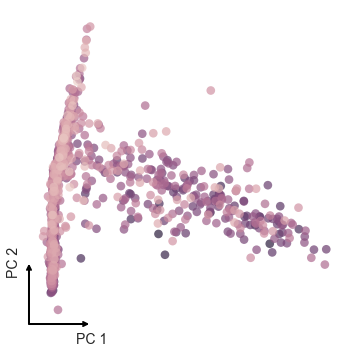

In [26]:
DR_plot(dim_name='PC').plot(tmp.obsm['X_pca'], color=tmp.obs['log1p_total_counts'])

In [27]:
sc.pp.neighbors(tmp, n_neighbors=30, use_rep='X')

In [28]:
sc.tl.umap(tmp)

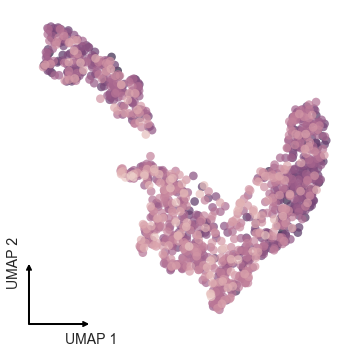

In [29]:
DR_plot(dim_name='UMAP').plot(tmp.obsm['X_umap'], color=tmp.obs['log1p_total_counts'])

In [30]:
tmp.obs = pd.merge(left=tmp.obs, right=usage_norm, how='left', left_index=True, right_index=True)

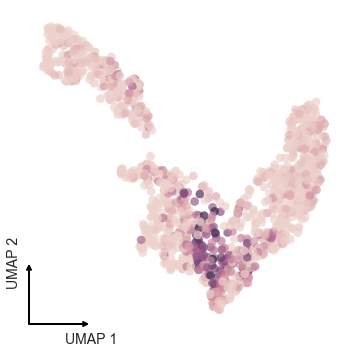

In [31]:
DR_plot(dim_name='UMAP').plot(tmp.obsm['X_umap'], color=tmp.obs['Usage_1'])

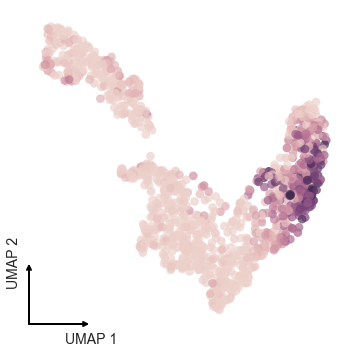

In [32]:
DR_plot(dim_name='UMAP').plot(tmp.obsm['X_umap'], color=tmp.obs['Usage_2'])

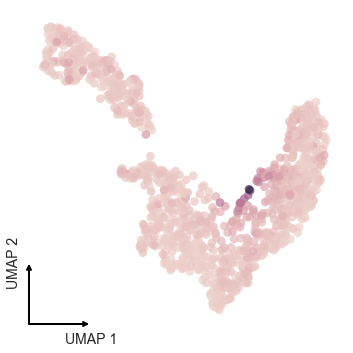

In [33]:
DR_plot(dim_name='UMAP').plot(tmp.obsm['X_umap'], color=tmp.obs['Usage_3'])

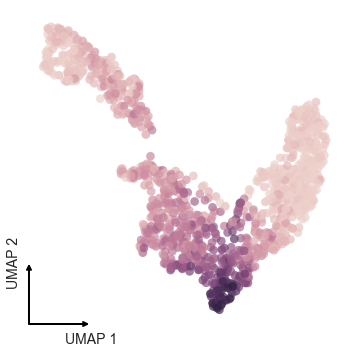

In [34]:
DR_plot(dim_name='UMAP').plot(tmp.obsm['X_umap'], color=tmp.obs['Usage_4'])

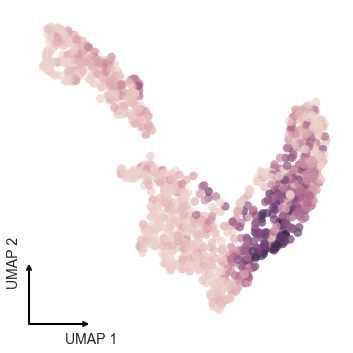

In [35]:
DR_plot(dim_name='UMAP').plot(tmp.obsm['X_umap'], color=tmp.obs['Usage_5'])

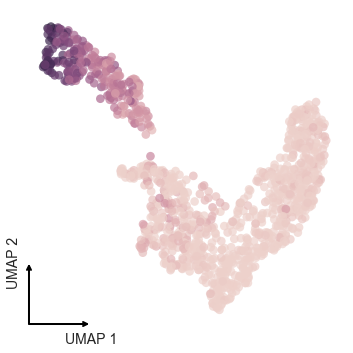

In [36]:
DR_plot(dim_name='UMAP').plot(tmp.obsm['X_umap'], color=tmp.obs['Usage_6'])

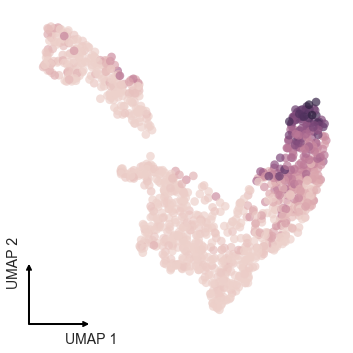

In [37]:
DR_plot(dim_name='UMAP').plot(tmp.obsm['X_umap'], color=tmp.obs['Usage_7'])

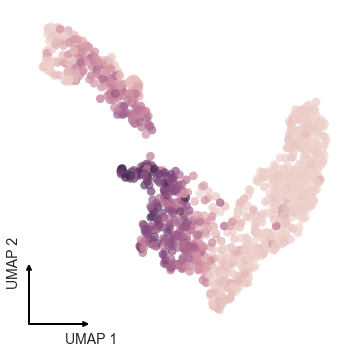

In [38]:
DR_plot(dim_name='UMAP').plot(tmp.obsm['X_umap'], color=tmp.obs['Usage_8'])

In [62]:
with np.load('cNMF/colon_cNMF/cnmf_tmp/colon_cNMF.spectra.k_8.dt_2_00.consensus.df.npz', allow_pickle=True) as test:
    tmp.varm['usages'] = test['data'].T

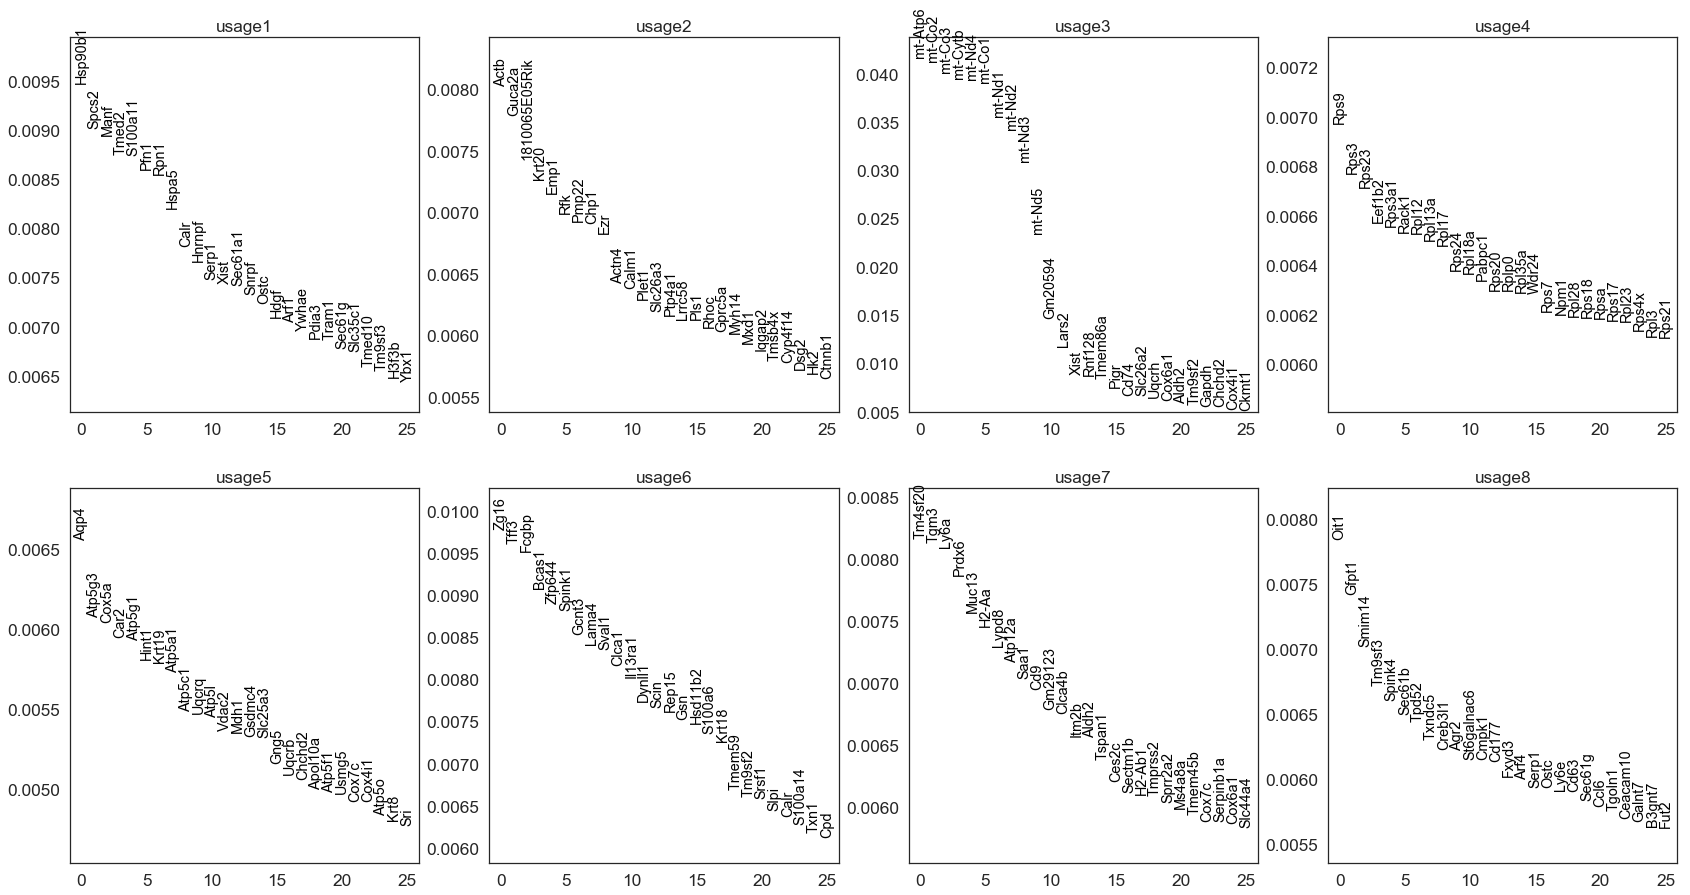

In [94]:
rank_genes(tmp, n_points=25)